In [1]:
%%HTML
<img src="https://spotifyhrblog.files.wordpress.com/2018/02/inclusion-image.jpg">
<br/> <br/>
<h1 style="font-size:34px;font-family:Lucida Console;" > Data Analysis: "19,000 Spotify Songs" (Part 1) </h1>
<p style="font-family:Lucida Console;" ><b> by André Devay Torres Gomes (10770089) <b/><p/>

---

## Table of Contents

- Introduction
- Initial Data Exploration (similar to analise_wine.pdf)
- Future Engeneering
- Deeper Data Exploration (Challenge)
- References

## 1. Introduction

Spotify is a streaming music, podcast and video service. It is the most popular and used streaming service in the world. Spotify is a freemium service; With basic features being free with advertisements or limitations, while additional features such as enhanced transmission quality and music downloads are offered for paid subscriptions. 

In this model, we will analyze the Spotify music dataset and visualize the correlations between the features. Our intention is to understand how the other features affect the popularity of music ("song_popularity").

In [2]:
%%HTML
<img src="https://media.tenor.co/images/01198122a3c83b55b821bc53735a99d8/raw">

 - To hide or show all the code, just click the button below!

In [3]:
%%HTML
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

### Environment Setting

Before we start we need set up the environment, please make sure those packages are installed in your computer when you copy this code to the local file.

In [47]:
#Importing stuff that I will need in this notebook


import pandas as pd
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
import collections
from ipywidgets import widgets
from ipywidgets import interact, interact_manual

In [5]:
import warnings
warnings.filterwarnings('ignore')

### Read Data File

The first task is to read data from .csv file. Most of the features are frequency of some especif word.

In [6]:
song_data = pd.read_csv( 'D:/tarefa3/song_data.csv')
song_info = pd.read_csv( 'D:/tarefa3/song_info.csv')
print ("Song Data size: ", song_data.shape)
print ("Sonf Info size: ", song_info.shape)

Song Data size:  (18835, 15)
Sonf Info size:  (18835, 4)


In [7]:
song_info.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [8]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


 - As we can see below, the database does not have missing data (which is good for a better analysis and predction).

In [9]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
song_name           18835 non-null object
song_popularity     18835 non-null int64
song_duration_ms    18835 non-null int64
acousticness        18835 non-null float64
danceability        18835 non-null float64
energy              18835 non-null float64
instrumentalness    18835 non-null float64
key                 18835 non-null int64
liveness            18835 non-null float64
loudness            18835 non-null float64
audio_mode          18835 non-null int64
speechiness         18835 non-null float64
tempo               18835 non-null float64
time_signature      18835 non-null int64
audio_valence       18835 non-null float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


## 2. Initial data exploration

 In this section, we will explore the "song_data" in order to understand what each feature means in the database and how they relate to each other. Based on the "wine" analysis, we will explore the "song_data" in this section.

In [10]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


### Song Durantion (in Ms)

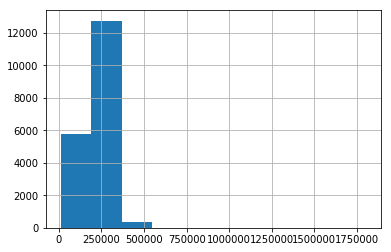

In [11]:
song_data['song_duration_ms'].hist()
plt.show()

 - As we all know, 60000 milliseconds equals 1 minute. Here, we can see that the most songs are between 200000 and 300000 ms and some between 400000-500000 and 100000-200000.

### Acousticness

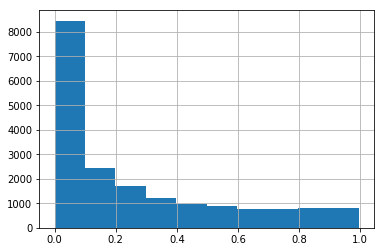

In [12]:
song_data['acousticness'].hist()
plt.show()

 - Acousticness is a confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. Between 0.4 and 1.0, the "song_data" has (more or less) the same amount of songs. Between 0.0 and 0.1, stands out the high amount of musics of our data.

### Danceability

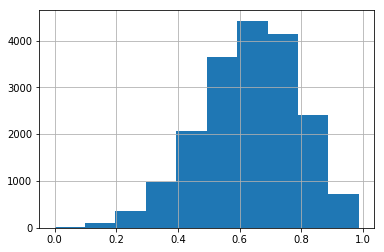

In [13]:
song_data['danceability'].hist()
plt.show()

 - This feature tells you how much music is danceable or not. Thus, we conclude that our database has the majority of songs above the danceability average.

### Energy

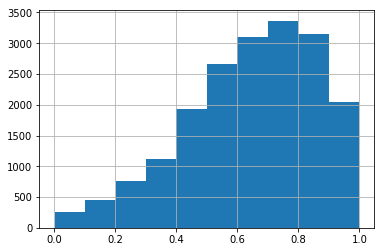

In [14]:
song_data['energy'].hist()
plt.show()

 - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. As we can see above, the amount of music is increasing along with the energy measure of our database. Only between 0.8 and 1.0, we have a decrease in the amount of songs.

### Instrumentalness

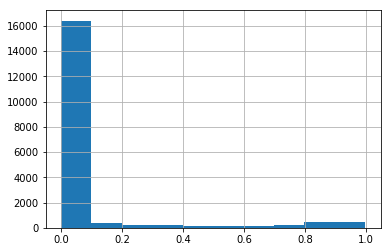

In [15]:
song_data['instrumentalness'].hist()
plt.show()

 - Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

### Key

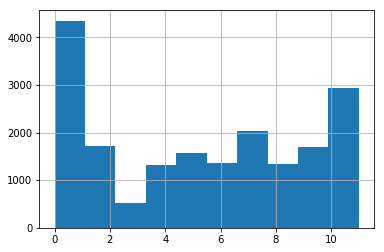

In [16]:
song_data['key'].hist()
plt.show()

 - In music a key is the major or minor scale around which a piece of music revolves. A song in a major key is based on a major scale and song in a minor key is based on a minor scale. In this histogram, we can see that our database has a diverse amount of keys.

### Liveness

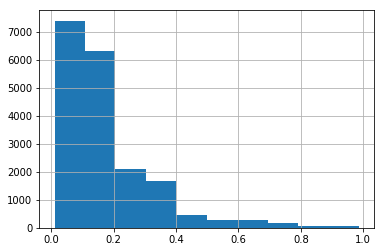

In [17]:
song_data['liveness'].hist()
plt.show()

 - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live. Thus, we realize that in most of the songs in our database, there are a studio recording.

### Loudness

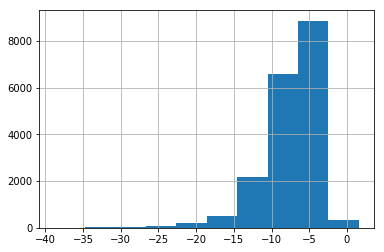

In [18]:
song_data['loudness'].hist()
plt.show()

 - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). As we can see above, the greatest amount of music is between -10 and 0 dB.

### Audio Mode

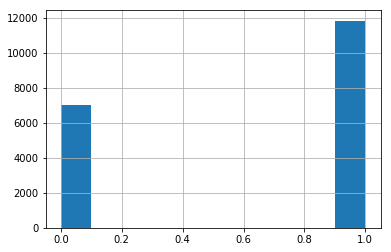

In [19]:
song_data['audio_mode'].hist()
plt.show()

 - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0. In this histogram, we can conclude that our database has more majors.

### Speechiness

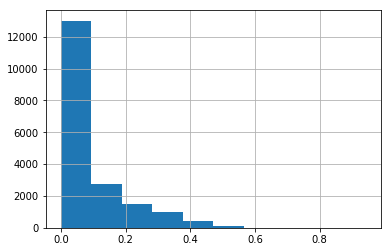

In [20]:
song_data['speechiness'].hist()
plt.show()

 - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording, the closer to 1.0 the attribute value. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. The histogram shows most of the songs with low speechiness in our database.

### Tempo

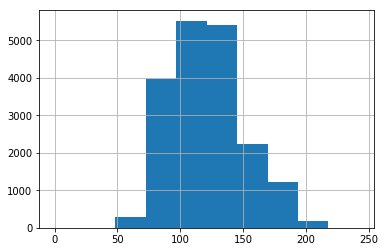

In [21]:
song_data['tempo'].hist()
plt.show()

 - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. We can percept that the songs are between 50 and 220 BPM and the most common is a song between 105-145 BPM.

### Time Signature

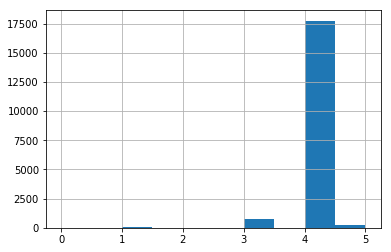

In [22]:
song_data['time_signature'].hist()
plt.show()

 - An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). We can see above that our data has more songs in 4 times (the most popular time signature).

### Audio Valence

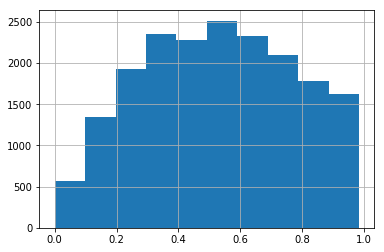

In [23]:
song_data['audio_valence'].hist()
plt.show()

 - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (happy, cheerful or euphoric), while tracks with low valence sound more negative (sad, depressed or angry). There are 

### Correlation Matrix

 - A correlation matrix is a table showing correlation coefficients between sets of variables. Each random variable (Xi) in the table is correlated with each of the other values in the table (Xj). This allows you to see which pairs have the highest correlation.

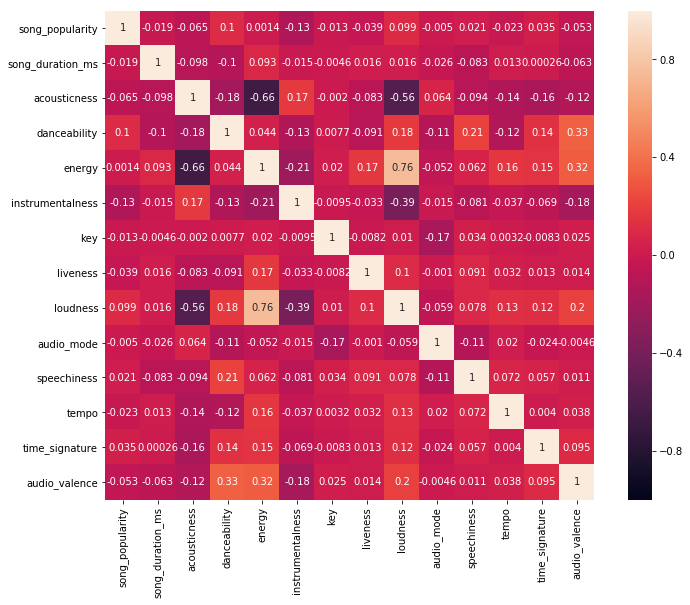

In [24]:
# Plot a correlation matrix

corrmat = song_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmin=-1, vmax=1, annot = True, square = True);

In [25]:
#Inspecting the top 10 variables which has higher postive correlation with the SalePrice (1st one is itself a SalePrice)
corrmat["song_popularity"].sort_values(ascending = False)[:11]

song_popularity     1.000000
danceability        0.104290
loudness            0.099442
time_signature      0.034983
speechiness         0.021479
energy              0.001365
audio_mode         -0.004969
key                -0.013160
song_duration_ms   -0.018899
tempo              -0.022672
liveness           -0.038937
Name: song_popularity, dtype: float64

 - As we can see in the above matrix, the features that have the highest correlation with the song popularity are: loudness, danceability and time signature. Therefore, we will analyze the relationships between these features through scatter plots. In the charts below, we will leave the points transparent through the alpha parameter, so that it is clear where there is a higher concentration of points (otherwise, some points would be "hidden" by other points).

### Song Popularity vs. Other Features

#### Danceability

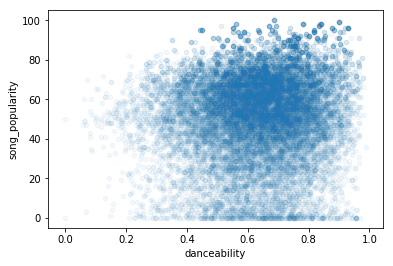

In [26]:
song_data.plot(x='danceability', y='song_popularity', alpha=.05, kind='scatter')
plt.show()

#### Loudness

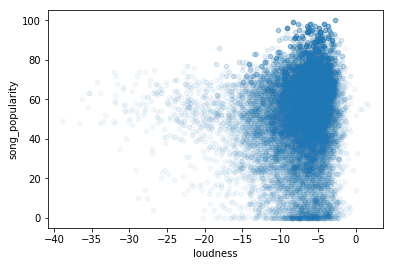

In [27]:
song_data.plot(x='loudness', y='song_popularity', alpha=.05, kind='scatter')
plt.show()

#### Time Signature

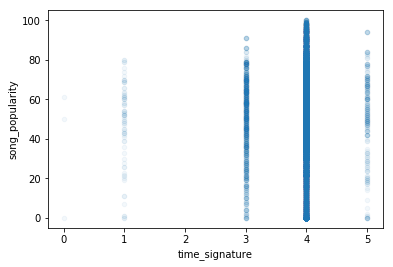

In [28]:
song_data.plot(x='time_signature', y='song_popularity', alpha=.05, kind='scatter')
plt.show()

#### Time Signature & Loudness

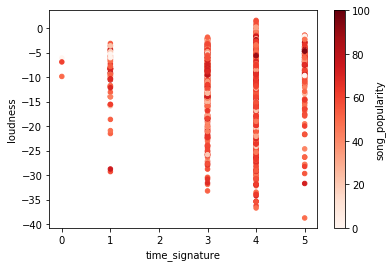

In [29]:
song_data.plot(x='time_signature', y='loudness', c='song_popularity', cmap='Reds', kind='scatter', sharex=False)
plt.show()

#### Danceability & Loudness

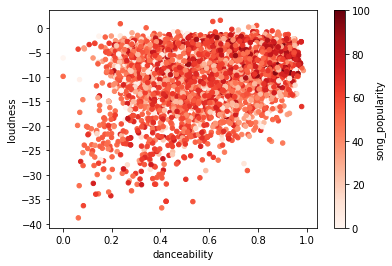

In [30]:
song_data.plot(x='danceability', y='loudness', c='song_popularity', cmap='Reds', kind='scatter', sharex=False)
plt.show()

#### Time Signature & Danceability

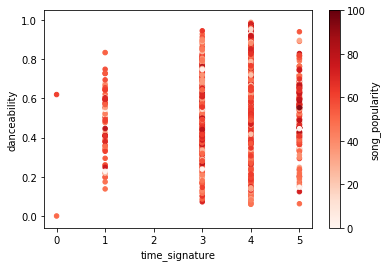

In [31]:
song_data.plot(x='time_signature', y='danceability', c='song_popularity', cmap='Reds', kind='scatter', sharex=False)
plt.show()

 - In the above graphs, we can see the relationship (in blue) of a variable only with "song_popularity" and also (in red) the relation of two variables with "song-popularity".

# 3. Deeper Data Exploration (Challenge)

In [32]:
def grafico(col):
    plt.figure(figsize=(16,5))
    plt.subplot(121)
    sns.distplot(col);

    plt.subplot(122)
    sns.boxplot(col);

 - Here we can see the distribution of "song_popularity"

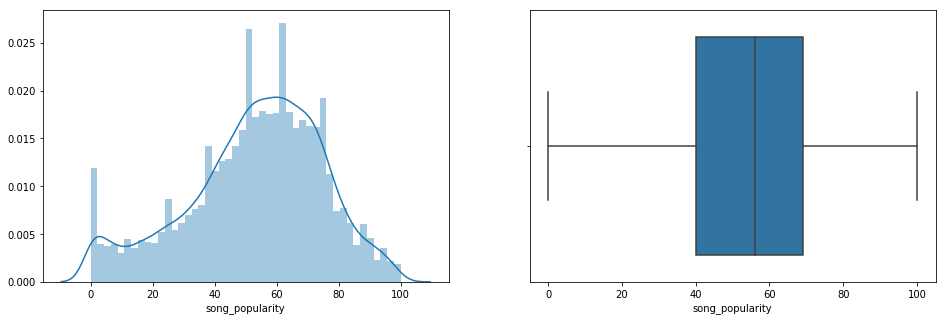

In [33]:
# Plot for "song_populrity variable

grafico(song_data['song_popularity'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C603C069E8>,
      dtype=object)

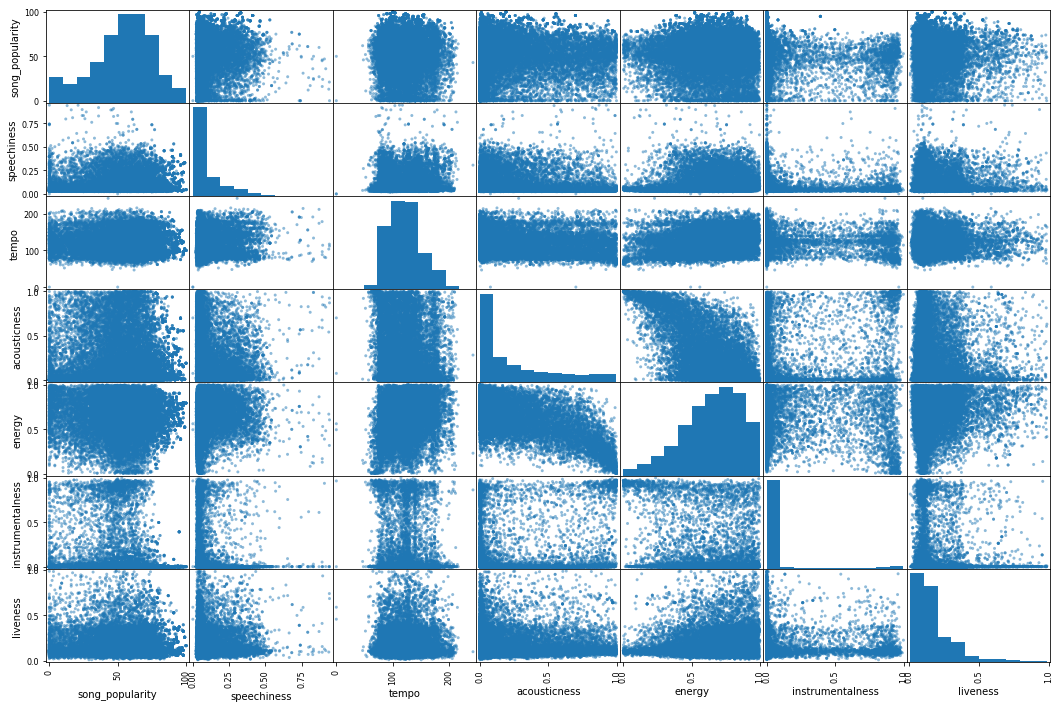

In [34]:
attributes = ['song_popularity', 'speechiness', 'tempo', 
              'acousticness', 'energy', 'instrumentalness', 'liveness',]
scatter_matrix(song_data[attributes], figsize=(18, 12))

# 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', , 'time_signature', 'audio_valence'

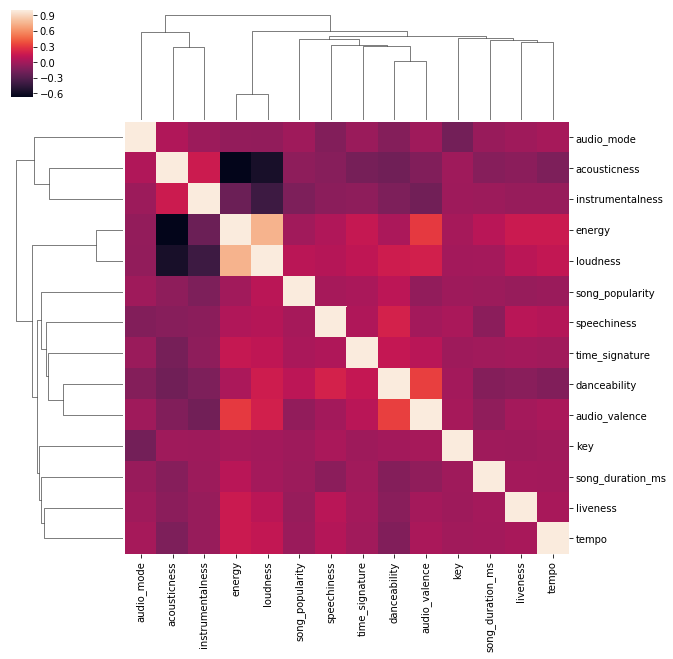

In [35]:
sns.clustermap(corrmat)

### Merge 'song_data' and 'song_info'

In [36]:
song_data = song_data.join(song_info['artist_name'])
song_data = song_data.join(song_info['playlist'])
song_data = song_data.join(song_info['album_names'])

In [50]:
print('Top 5 most common artists:')
print()
Counter(song_data['artist_name']).most_common(5)

Top 5 most common artists:



[('Kanye West', 82),
 ('Lady Gaga', 78),
 ('Drake', 68),
 ('Khalid', 61),
 ('Eminem', 47)]

In [51]:
print('Top 5 most common playlists:')
print()
Counter(song_data['playlist']).most_common(5)

Top 5 most common playlists:



[('60s Rock Anthems', 100),
 ('70s Rock Anthems', 100),
 ('80s Hard Rock', 100),
 ('80s Rock Anthems', 100),
 ('90s Pop Rock Essentials', 100)]

In [52]:
print('Top 5 most common albums:')
print()
Counter(song_data['album_names']).most_common(5)

Top 5 most common albums:



[('Greatest Hits', 66),
 ('Spotify Singles', 45),
 ('Scorpion', 36),
 ('Tha Carter V', 30),
 ('ASTROWORLD', 30)]